In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.pandas.set_option("display.max_columns", None)

In [2]:
data = pd.read_csv("DataCoSupplyChainDataset.csv", encoding='latin-1')

In [3]:
data.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class


### Summary of data

In [4]:
print(f"The data has {data.shape[0]} rows and {data.shape[1]} columns")

The data has 180519 rows and 53 columns


In [5]:
# calculate the mean and median of the numerical features in the dataset
dataset = data.copy()

def mean_med_cal(dataset):
    try:
        numerical_feature = [feature for feature in dataset.columns if dataset[feature].dtype != "O"]
        for feature in numerical_feature:
            mean = np.round(np.mean(dataset[feature]), 3)
            median = np.round(np.median(dataset[feature]), 3)
            print(f"The mean of {feature} is {mean}, while the median is {median}")
    except Exception as e:
        return str(e)
    
mean_med_cal(dataset)

The mean of Days for shipping (real) is 3.498, while the median is 3.0
The mean of Days for shipment (scheduled) is 2.932, while the median is 4.0
The mean of Benefit per order is 21.975, while the median is 31.52
The mean of Sales per customer is 183.108, while the median is 163.99
The mean of Late_delivery_risk is 0.548, while the median is 1.0
The mean of Category Id is 31.851, while the median is 29.0
The mean of Customer Id is 6691.379, while the median is 6457.0
The mean of Customer Zipcode is 35921.127, while the median is nan
The mean of Department Id is 5.443, while the median is 5.0
The mean of Latitude is 29.72, while the median is 33.145
The mean of Longitude is -84.916, while the median is -76.848
The mean of Order Customer Id is 6691.379, while the median is 6457.0
The mean of Order Id is 36221.895, while the median is 36140.0
The mean of Order Item Cardprod Id is 692.51, while the median is 627.0
The mean of Order Item Discount is 20.665, while the median is 14.0
The mea

### Unique Values

In [6]:
numerical_feature = [feature for feature in data.columns if data[feature].dtype != "O"]

In [7]:
for feature in numerical_feature:
    print("The length of unique keys in",feature, "is", len(dataset[feature].unique()))

The length of unique keys in Days for shipping (real) is 7
The length of unique keys in Days for shipment (scheduled) is 4
The length of unique keys in Benefit per order is 21998
The length of unique keys in Sales per customer is 2927
The length of unique keys in Late_delivery_risk is 2
The length of unique keys in Category Id is 51
The length of unique keys in Customer Id is 20652
The length of unique keys in Customer Zipcode is 996
The length of unique keys in Department Id is 11
The length of unique keys in Latitude is 11250
The length of unique keys in Longitude is 4487
The length of unique keys in Order Customer Id is 20652
The length of unique keys in Order Id is 65752
The length of unique keys in Order Item Cardprod Id is 118
The length of unique keys in Order Item Discount is 1017
The length of unique keys in Order Item Discount Rate is 18
The length of unique keys in Order Item Id is 180519
The length of unique keys in Order Item Product Price is 75
The length of unique keys i

In [8]:
# Printing out the Numerical_Feature in the dataset
dataset[numerical_feature].head(10)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
0,3,4,91.250000,314.640015,0,73,20755,725.0,2,18.251453,-66.037056,20755,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,NaN,1360,73,NaN,327.75,0
1,5,4,-249.089996,311.359985,1,73,19492,725.0,2,18.279451,-66.037064,19492,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,NaN,1360,73,NaN,327.75,0
2,4,4,-247.779999,309.720001,0,73,19491,95125.0,2,37.292233,-121.881279,19491,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,NaN,1360,73,NaN,327.75,0
3,3,4,22.860001,304.809998,0,73,19490,90027.0,2,34.125946,-118.291016,19490,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,NaN,1360,73,NaN,327.75,0
4,2,4,134.210007,298.250000,0,73,19489,725.0,2,18.253769,-66.037048,19489,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,NaN,1360,73,NaN,327.75,0
5,6,4,18.580000,294.980011,0,73,19488,14150.0,2,43.013969,-78.879066,19488,75935,1360,32.779999,0.10,179250,327.75,0.06,1,327.75,294.980011,18.580000,NaN,1360,73,NaN,327.75,0
6,2,1,95.180000,288.420013,1,73,19487,725.0,2,18.242538,-66.037056,19487,75934,1360,39.330002,0.12,179249,327.75,0.33,1,327.75,288.420013,95.180000,NaN,1360,73,NaN,327.75,0
7,2,1,68.430000,285.140015,1,73,19486,33162.0,2,25.928869,-80.162872,19486,75933,1360,42.610001,0.13,179248,327.75,0.24,1,327.75,285.140015,68.430000,NaN,1360,73,NaN,327.75,0
8,3,2,133.720001,278.589996,1,73,19485,725.0,2,18.233223,-66.037056,19485,75932,1360,49.160000,0.15,179247,327.75,0.48,1,327.75,278.589996,133.720001,NaN,1360,73,NaN,327.75,0
9,2,1,132.149994,275.309998,1,73,19484,94583.0,2,37.773991,-121.966629,19484,75931,1360,52.439999,0.16,179246,327.75,0.48,1,327.75,275.309998,132.149994,NaN,1360,73,NaN,327.75,0


In [9]:
# Gathering more information from the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [10]:
continuous_feature = [feature for feature in numerical_feature if dataset[feature].dtype == "float64"]

In [11]:
for feature in continuous_feature:
    range = np.max(dataset[feature]) - np.min(dataset[feature])
    print(f"The range of {feature} is {range}")

The range of Benefit per order is 5186.7799678
The range of Sales per customer is 1932.499990229
The range of Customer Zipcode is 98602.0
The range of Latitude is 82.71948624000001
The range of Longitude is 273.2890625
The range of Order Item Discount is 500.0
The range of Order Item Discount Rate is 0.25
The range of Order Item Product Price is 1989.999990229
The range of Order Item Profit Ratio is 3.25
The range of Sales is 1989.999990229
The range of Order Item Total is 1932.499990229
The range of Order Profit Per Order is 5186.7799678
The range of Order Zipcode is 98261.0
The range of Product Description is nan
The range of Product Price is 1989.999990229


### Plotting the distribution of each feature apart from latitude and longitude in the dataset

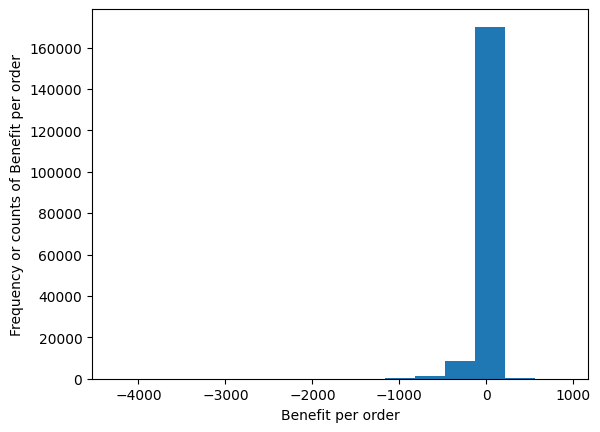

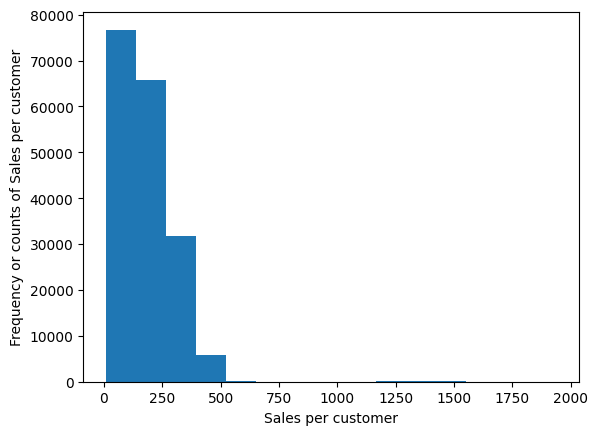

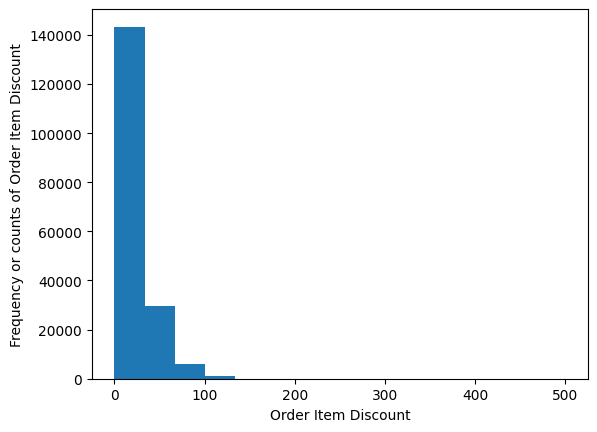

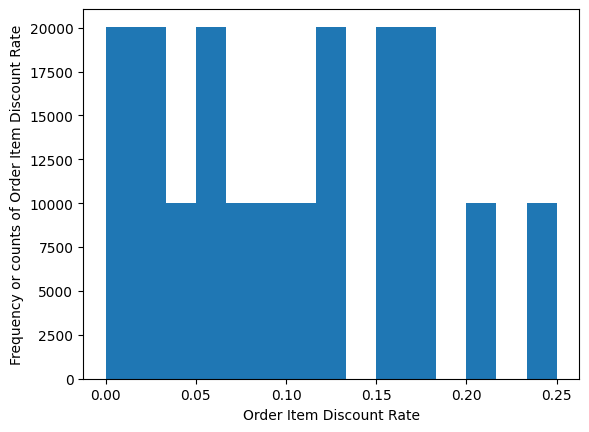

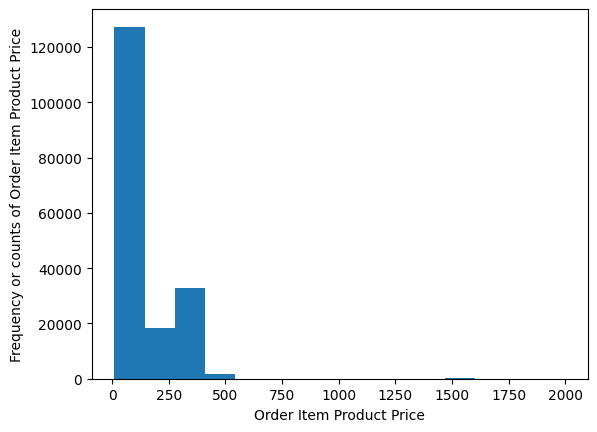

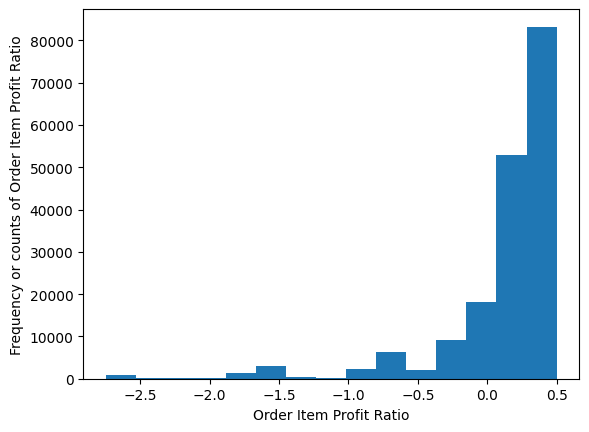

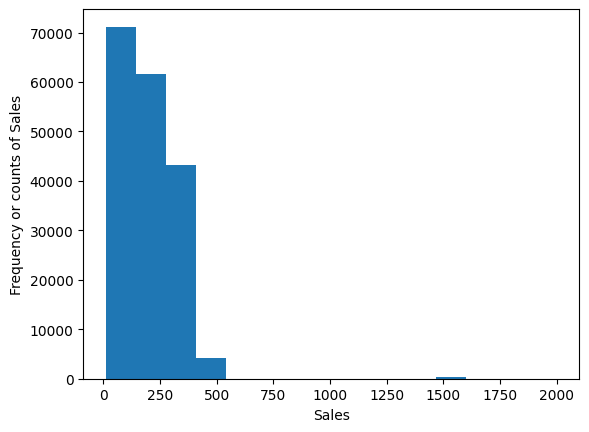

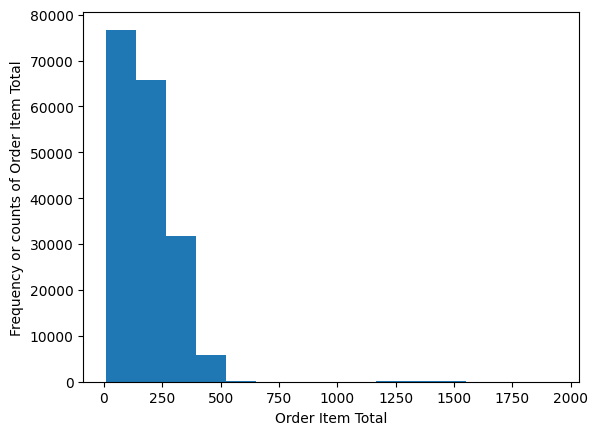

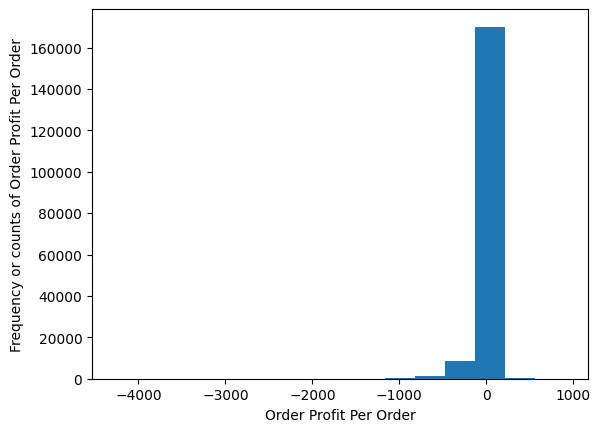

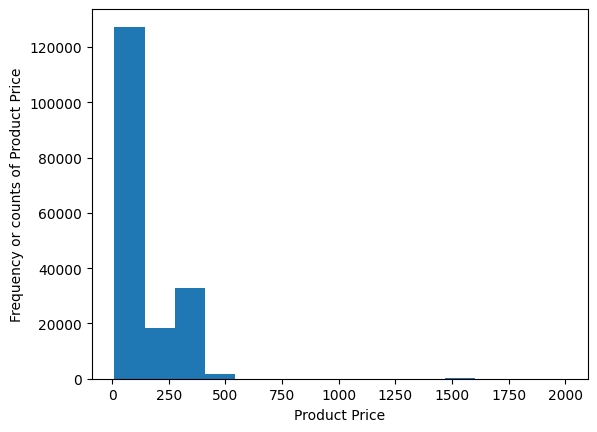

In [12]:
for feature in continuous_feature:
    if "Latitude" in feature or "Longitude" in feature or (dataset[feature].isnull().sum() >= 1):
        pass
    else:
        plt.hist(dataset[feature], bins=15, stacked=True, histtype="barstacked")
        plt.xlabel(feature)
        plt.ylabel(f"Frequency or counts of {feature}")
        plt.show()

In [13]:
## Getting categorical Features, and printing the information got from them
categorical_feature = [feature for feature in dataset.columns if feature not in numerical_feature]

dataset[categorical_feature].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Type                        180519 non-null  object
 1   Delivery Status             180519 non-null  object
 2   Category Name               180519 non-null  object
 3   Customer City               180519 non-null  object
 4   Customer Country            180519 non-null  object
 5   Customer Email              180519 non-null  object
 6   Customer Fname              180519 non-null  object
 7   Customer Lname              180511 non-null  object
 8   Customer Password           180519 non-null  object
 9   Customer Segment            180519 non-null  object
 10  Customer State              180519 non-null  object
 11  Customer Street             180519 non-null  object
 12  Department Name             180519 non-null  object
 13  Market                      1

In [14]:
# Getting the sum of missing values in the categorical feature
dataset[categorical_feature].isnull().sum()

Type                          0
Delivery Status               0
Category Name                 0
Customer City                 0
Customer Country              0
Customer Email                0
Customer Fname                0
Customer Lname                8
Customer Password             0
Customer Segment              0
Customer State                0
Customer Street               0
Department Name               0
Market                        0
Order City                    0
Order Country                 0
order date (DateOrders)       0
Order Region                  0
Order State                   0
Order Status                  0
Product Image                 0
Product Name                  0
shipping date (DateOrders)    0
Shipping Mode                 0
dtype: int64

### No missing values in the categorical feature

In [15]:
for feature in categorical_feature:
   print(f"Unique Value: {dataset[[feature]].value_counts()}") 
   print("=" * 50)

Unique Value: Type    
DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: count, dtype: int64
Unique Value: Delivery Status  
Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: count, dtype: int64
Unique Value: Category Name       
Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves              1070
Trade-In                  974
Video Games               838
Children's Clothing       652
Women's Clothing          650
Baseball & Softball       632
Hockey                    614
Cameras                   592
Toys                      529
Golf Shoes        

In [16]:
dataset.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class


In [17]:
dataset.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

### List of columns to drop

<ul>
    <li>Customer Email</li>
    <li>Customer Fname</li>
    <li>Customer Lname</li>
    <li>Customer Password</li>
    <li>Customer Phone Number</li>
    <li>Product Description</li>
    <li>Product Image</li>
</ul>
## Data Cleaning and Preparation for Machine Learning Model Building

In [18]:
dropped_list = ["Customer Email", "Customer Fname", "Customer Lname", "Customer Password", \
                 "Product Description", "Product Image"]

In [19]:
dataset = dataset.drop(dropped_list, axis=1)

In [20]:
len(dataset.columns)

47

In [21]:
dataset.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Id                           0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0
Order City                            0
Order Country                         0
Order Customer Id                     0
order date (DateOrders)               0


In [22]:
dataset.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,Smart watch,327.75,0,1/18/2018 12:27,Standard Class


### Feature Engineering

### Data for type column will be cast into numerical values for easy ML interpretation

In [23]:
dataset["Type"].unique()

array(['DEBIT', 'TRANSFER', 'CASH', 'PAYMENT'], dtype=object)

<Axes: xlabel='Type', ylabel='Product Price'>

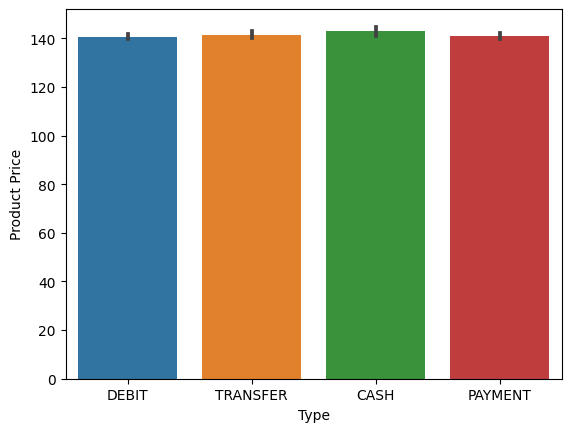

In [24]:
sns.barplot(data=dataset, x="Type", y="Product Price")

In [25]:
type_one_hot = pd.get_dummies(dataset["Type"], drop_first=True, dtype="int")
type_one_hot.head(2)

,DEBIT,PAYMENT,TRANSFER
0,1,0,0
1,0,0,1


In [26]:
dataset = pd.concat([dataset, type_one_hot], axis=1)

In [27]:
dataset.drop("Type", axis=1, inplace=True)

dataset.head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,DEBIT,PAYMENT,TRANSFER
0,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,1,0,0
1,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,0,0,1
2,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,Smart watch,327.75,0,1/17/2018 12:06,Standard Class,0,0,0
3,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,Smart watch,327.75,0,1/16/2018 11:45,Standard Class,1,0,0
4,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,Smart watch,327.75,0,1/15/2018 11:24,Standard Class,0,1,0


### Data for Delivery Status will be cast into numerical values too for easy ML interpretation

In [28]:
# we check for the unique values in the dataset

dataset["Delivery Status"].unique()

array(['Advance shipping', 'Late delivery', 'Shipping on time',
       'Shipping canceled'], dtype=object)

In [29]:
Delivery_status_one_hot = pd.get_dummies(dataset["Delivery Status"], drop_first=True, dtype="int")

In [30]:
dataset = pd.concat([dataset, Delivery_status_one_hot], axis=1)

In [31]:
dataset.drop("Delivery Status", axis=1, inplace=True)

In [32]:
dataset.head(2)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,DEBIT,PAYMENT,TRANSFER,Late delivery,Shipping canceled,Shipping on time
0,3,4,91.250000,314.640015,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,1,0,0,0,0,0
1,5,4,-249.089996,311.359985,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,0,0,1,1,0,0


In [33]:
dataset.drop("Customer Street", axis=1, inplace=True)

dataset.head(2)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,DEBIT,PAYMENT,TRANSFER,Late delivery,Shipping canceled,Shipping on time
0,3,4,91.250000,314.640015,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,1,0,0,0,0,0
1,5,4,-249.089996,311.359985,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,0,0,1,1,0,0


In [34]:
dataset["Order Zipcode"].isnull().sum()

155679

In [35]:
dataset = dataset.drop("Order Zipcode", axis=1)

In [36]:
dataset.head(2)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,DEBIT,PAYMENT,TRANSFER,Late delivery,Shipping canceled,Shipping on time
0,3,4,91.250000,314.640015,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,1,0,0,0,0,0
1,5,4,-249.089996,311.359985,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,0,0,1,1,0,0


In [37]:
new_categorical_feature = [feature for feature in dataset.columns if dataset[feature].dtype == "O"]

print(len(new_categorical_feature))

16


In [38]:
cat_dataset = dataset[new_categorical_feature]

cat_dataset.head(2)

,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,order date (DateOrders),Order Region,Order State,Order Status,Product Name,shipping date (DateOrders),Shipping Mode
0,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,Southeast Asia,Java Occidental,COMPLETE,Smart watch,2/3/2018 22:56,Standard Class
1,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:27,South Asia,Rajastán,PENDING,Smart watch,1/18/2018 12:27,Standard Class


In [39]:
new_numerical_feature = [feature for feature in dataset.columns if feature not in new_categorical_feature]

print(len(new_categorical_feature))

16


In [40]:
num_dataset = dataset[new_numerical_feature]
num_dataset.head(2)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price,Product Status,DEBIT,PAYMENT,TRANSFER,Late delivery,Shipping canceled,Shipping on time
0,3,4,91.250000,314.640015,0,73,20755,725.0,2,18.251453,-66.037056,20755,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,1360,73,327.75,0,1,0,0,0,0,0
1,5,4,-249.089996,311.359985,1,73,19492,725.0,2,18.279451,-66.037064,19492,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,1360,73,327.75,0,0,0,1,1,0,0


In [41]:
for feature in new_categorical_feature:
    print(f"{feature} has {len(cat_dataset[feature].unique())} unique values")

Category Name has 50 unique values
Customer City has 563 unique values
Customer Country has 2 unique values
Customer Segment has 3 unique values
Customer State has 46 unique values
Department Name has 11 unique values
Market has 5 unique values
Order City has 3597 unique values
Order Country has 164 unique values
order date (DateOrders) has 65752 unique values
Order Region has 23 unique values
Order State has 1089 unique values
Order Status has 9 unique values
Product Name has 118 unique values
shipping date (DateOrders) has 63701 unique values
Shipping Mode has 4 unique values


In [42]:
for feature in new_categorical_feature:
    if len(dataset[feature].unique()) <= 5:
        new_dataset = pd.get_dummies(dataset[feature], dtype="int")
        dataset = pd.concat([dataset, new_dataset], axis=1)
        dataset.drop(feature, axis=1, inplace=True)
dataset.head(2)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Id,Customer State,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),DEBIT,PAYMENT,TRANSFER,Late delivery,Shipping canceled,Shipping on time,EE. UU.,Puerto Rico,Consumer,Corporate,Home Office,Africa,Europe,LATAM,Pacific Asia,USCA,First Class,Same Day,Second Class,Standard Class
0,3,4,91.250000,314.640015,0,73,Sporting Goods,Caguas,20755,PR,725.0,2,Fitness,18.251453,-66.037056,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,2/3/2018 22:56,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1
1,5,4,-249.089996,311.359985,1,73,Sporting Goods,Caguas,19492,PR,725.0,2,Fitness,18.279451,-66.037064,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,0,1/18/2018 12:27,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1


In [43]:
len(dataset["Customer City"].unique())

563

In [44]:
dataset["Order Month"] = dataset["order date (DateOrders)"].str.split("/").str[0]
dataset["Order Day"] = dataset["order date (DateOrders)"].str.split("/").str[1]
dataset["Order year"] = dataset["order date (DateOrders)"].str.split("/").str[2]

In [45]:
dataset.head(2)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Id,Customer State,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),DEBIT,PAYMENT,TRANSFER,Late delivery,Shipping canceled,Shipping on time,EE. UU.,Puerto Rico,Consumer,Corporate,Home Office,Africa,Europe,LATAM,Pacific Asia,USCA,First Class,Same Day,Second Class,Standard Class,Order Month,Order Day,Order year
0,3,4,91.250000,314.640015,0,73,Sporting Goods,Caguas,20755,PR,725.0,2,Fitness,18.251453,-66.037056,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,2/3/2018 22:56,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,31,2018 22:56
1,5,4,-249.089996,311.359985,1,73,Sporting Goods,Caguas,19492,PR,725.0,2,Fitness,18.279451,-66.037064,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,0,1/18/2018 12:27,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,13,2018 12:27


In [46]:
dataset["Order year"] = dataset["Order year"].str.split(" ").str[0]

In [47]:
dataset.head(2)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Id,Customer State,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),DEBIT,PAYMENT,TRANSFER,Late delivery,Shipping canceled,Shipping on time,EE. UU.,Puerto Rico,Consumer,Corporate,Home Office,Africa,Europe,LATAM,Pacific Asia,USCA,First Class,Same Day,Second Class,Standard Class,Order Month,Order Day,Order year
0,3,4,91.250000,314.640015,0,73,Sporting Goods,Caguas,20755,PR,725.0,2,Fitness,18.251453,-66.037056,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,2/3/2018 22:56,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,31,2018
1,5,4,-249.089996,311.359985,1,73,Sporting Goods,Caguas,19492,PR,725.0,2,Fitness,18.279451,-66.037064,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,0,1/18/2018 12:27,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,13,2018


In [48]:
dataset["Order Time"] = dataset["order date (DateOrders)"].str.split(" ").str[-1]

In [49]:
dataset.head(2)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Id,Customer State,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),DEBIT,PAYMENT,TRANSFER,Late delivery,Shipping canceled,Shipping on time,EE. UU.,Puerto Rico,Consumer,Corporate,Home Office,Africa,Europe,LATAM,Pacific Asia,USCA,First Class,Same Day,Second Class,Standard Class,Order Month,Order Day,Order year,Order Time
0,3,4,91.250000,314.640015,0,73,Sporting Goods,Caguas,20755,PR,725.0,2,Fitness,18.251453,-66.037056,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,2/3/2018 22:56,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,31,2018,22:56
1,5,4,-249.089996,311.359985,1,73,Sporting Goods,Caguas,19492,PR,725.0,2,Fitness,18.279451,-66.037064,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,0,1/18/2018 12:27,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,13,2018,12:27


In [50]:
dataset["Order Hour"] = dataset["Order Time"].str.split(":").str[0]
dataset["Order Minutes"] = dataset["Order Time"].str.split(":").str[-1]

In [51]:
dataset.head(2)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Id,Customer State,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),DEBIT,PAYMENT,TRANSFER,Late delivery,Shipping canceled,Shipping on time,EE. UU.,Puerto Rico,Consumer,Corporate,Home Office,Africa,Europe,LATAM,Pacific Asia,USCA,First Class,Same Day,Second Class,Standard Class,Order Month,Order Day,Order year,Order Time,Order Hour,Order Minutes
0,3,4,91.250000,314.640015,0,73,Sporting Goods,Caguas,20755,PR,725.0,2,Fitness,18.251453,-66.037056,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,2/3/2018 22:56,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,31,2018,22:56,22,56
1,5,4,-249.089996,311.359985,1,73,Sporting Goods,Caguas,19492,PR,725.0,2,Fitness,18.279451,-66.037064,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,0,1/18/2018 12:27,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,13,2018,12:27,12,27


In [52]:
dataset.drop(["Order Time", "order date (DateOrders)"], axis=1, inplace=True)

In [53]:
dataset.head(2)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Id,Customer State,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Order City,Order Country,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),DEBIT,PAYMENT,TRANSFER,Late delivery,Shipping canceled,Shipping on time,EE. UU.,Puerto Rico,Consumer,Corporate,Home Office,Africa,Europe,LATAM,Pacific Asia,USCA,First Class,Same Day,Second Class,Standard Class,Order Month,Order Day,Order year,Order Hour,Order Minutes
0,3,4,91.250000,314.640015,0,73,Sporting Goods,Caguas,20755,PR,725.0,2,Fitness,18.251453,-66.037056,Bekasi,Indonesia,20755,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,2/3/2018 22:56,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,31,2018,22,56
1,5,4,-249.089996,311.359985,1,73,Sporting Goods,Caguas,19492,PR,725.0,2,Fitness,18.279451,-66.037064,Bikaner,India,19492,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,0,1/18/2018 12:27,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,13,2018,12,27


In [54]:
dataset["Order Status"].unique()

array(['COMPLETE', 'PENDING', 'CLOSED', 'PENDING_PAYMENT', 'CANCELED',
       'PROCESSING', 'SUSPECTED_FRAUD', 'ON_HOLD', 'PAYMENT_REVIEW'],
      dtype=object)

In [55]:
dataset["ShippingMonth"] = dataset["shipping date (DateOrders)"].str.split("/").str[0]
dataset["Shipping Day"] = dataset["shipping date (DateOrders)"].str.split("/").str[1]
dataset["Shipping year"] = dataset["shipping date (DateOrders)"].str.split("/").str[2]

In [56]:
dataset.head(2)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Id,Customer State,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Order City,Order Country,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),DEBIT,PAYMENT,TRANSFER,Late delivery,Shipping canceled,Shipping on time,EE. UU.,Puerto Rico,Consumer,Corporate,Home Office,Africa,Europe,LATAM,Pacific Asia,USCA,First Class,Same Day,Second Class,Standard Class,Order Month,Order Day,Order year,Order Hour,Order Minutes,ShippingMonth,Shipping Day,Shipping year
0,3,4,91.250000,314.640015,0,73,Sporting Goods,Caguas,20755,PR,725.0,2,Fitness,18.251453,-66.037056,Bekasi,Indonesia,20755,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,2/3/2018 22:56,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,31,2018,22,56,2,3,2018 22:56
1,5,4,-249.089996,311.359985,1,73,Sporting Goods,Caguas,19492,PR,725.0,2,Fitness,18.279451,-66.037064,Bikaner,India,19492,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,0,1/18/2018 12:27,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,13,2018,12,27,1,18,2018 12:27


In [57]:
dataset["Shipping Year"] = dataset["Shipping year"].str.split(" ").str[0]

In [58]:
dataset.head(2)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Id,Customer State,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Order City,Order Country,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),DEBIT,PAYMENT,TRANSFER,Late delivery,Shipping canceled,Shipping on time,EE. UU.,Puerto Rico,Consumer,Corporate,Home Office,Africa,Europe,LATAM,Pacific Asia,USCA,First Class,Same Day,Second Class,Standard Class,Order Month,Order Day,Order year,Order Hour,Order Minutes,ShippingMonth,Shipping Day,Shipping year,Shipping Year
0,3,4,91.250000,314.640015,0,73,Sporting Goods,Caguas,20755,PR,725.0,2,Fitness,18.251453,-66.037056,Bekasi,Indonesia,20755,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,2/3/2018 22:56,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,31,2018,22,56,2,3,2018 22:56,2018
1,5,4,-249.089996,311.359985,1,73,Sporting Goods,Caguas,19492,PR,725.0,2,Fitness,18.279451,-66.037064,Bikaner,India,19492,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,0,1/18/2018 12:27,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,13,2018,12,27,1,18,2018 12:27,2018


In [59]:
dataset["Shipping Time"] = dataset["shipping date (DateOrders)"].str.split(" ").str[-1]
dataset["Shipping Hour"] = dataset["Shipping Time"].str.split(":").str[0]
dataset["Shipping Minutes"] = dataset["Shipping Time"].str.split(":").str[-1]


dataset.head(2)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Id,Customer State,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Order City,Order Country,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),DEBIT,PAYMENT,TRANSFER,Late delivery,Shipping canceled,Shipping on time,EE. UU.,Puerto Rico,Consumer,Corporate,Home Office,Africa,Europe,LATAM,Pacific Asia,USCA,First Class,Same Day,Second Class,Standard Class,Order Month,Order Day,Order year,Order Hour,Order Minutes,ShippingMonth,Shipping Day,Shipping year,Shipping Year,Shipping Time,Shipping Hour,Shipping Minutes
0,3,4,91.250000,314.640015,0,73,Sporting Goods,Caguas,20755,PR,725.0,2,Fitness,18.251453,-66.037056,Bekasi,Indonesia,20755,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,2/3/2018 22:56,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,31,2018,22,56,2,3,2018 22:56,2018,22:56,22,56
1,5,4,-249.089996,311.359985,1,73,Sporting Goods,Caguas,19492,PR,725.0,2,Fitness,18.279451,-66.037064,Bikaner,India,19492,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,0,1/18/2018 12:27,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,13,2018,12,27,1,18,2018 12:27,2018,12:27,12,27


In [60]:
dataset.drop(["Shipping year", "Shipping Time", "shipping date (DateOrders)"], axis=1, inplace=True)

In [61]:
dataset.head(2)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Id,Customer State,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Order City,Order Country,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,DEBIT,PAYMENT,TRANSFER,Late delivery,Shipping canceled,Shipping on time,EE. UU.,Puerto Rico,Consumer,Corporate,Home Office,Africa,Europe,LATAM,Pacific Asia,USCA,First Class,Same Day,Second Class,Standard Class,Order Month,Order Day,Order year,Order Hour,Order Minutes,ShippingMonth,Shipping Day,Shipping Year,Shipping Hour,Shipping Minutes
0,3,4,91.250000,314.640015,0,73,Sporting Goods,Caguas,20755,PR,725.0,2,Fitness,18.251453,-66.037056,Bekasi,Indonesia,20755,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,31,2018,22,56,2,3,2018,22,56
1,5,4,-249.089996,311.359985,1,73,Sporting Goods,Caguas,19492,PR,725.0,2,Fitness,18.279451,-66.037064,Bikaner,India,19492,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,13,2018,12,27,1,18,2018,12,27


### Dropping Categorical Variables or Features with ID to identify them

In [62]:
dataset.drop(["Category Name", "Customer State", "Customer City", "Department Name", "Order City", "Order Country", "Order Region", "Order State", "Product Name"], axis=1, inplace=True)

In [63]:
dataset.head(2)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Status,Product Card Id,Product Category Id,Product Price,Product Status,DEBIT,PAYMENT,TRANSFER,Late delivery,Shipping canceled,Shipping on time,EE. UU.,Puerto Rico,Consumer,Corporate,Home Office,Africa,Europe,LATAM,Pacific Asia,USCA,First Class,Same Day,Second Class,Standard Class,Order Month,Order Day,Order year,Order Hour,Order Minutes,ShippingMonth,Shipping Day,Shipping Year,Shipping Hour,Shipping Minutes
0,3,4,91.250000,314.640015,0,73,20755,725.0,2,18.251453,-66.037056,20755,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,COMPLETE,1360,73,327.75,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,31,2018,22,56,2,3,2018,22,56
1,5,4,-249.089996,311.359985,1,73,19492,725.0,2,18.279451,-66.037064,19492,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,PENDING,1360,73,327.75,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,13,2018,12,27,1,18,2018,12,27


In [64]:
dataset["Order Status"].unique()

array(['COMPLETE', 'PENDING', 'CLOSED', 'PENDING_PAYMENT', 'CANCELED',
       'PROCESSING', 'SUSPECTED_FRAUD', 'ON_HOLD', 'PAYMENT_REVIEW'],
      dtype=object)

In [65]:
order = pd.get_dummies(dataset["Order Status"], dtype="int64", drop_first=True)



In [66]:
dataset.drop("Order Status", axis=1, inplace=True)

In [67]:
dataset.head(2)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price,Product Status,DEBIT,PAYMENT,TRANSFER,Late delivery,Shipping canceled,Shipping on time,EE. UU.,Puerto Rico,Consumer,Corporate,Home Office,Africa,Europe,LATAM,Pacific Asia,USCA,First Class,Same Day,Second Class,Standard Class,Order Month,Order Day,Order year,Order Hour,Order Minutes,ShippingMonth,Shipping Day,Shipping Year,Shipping Hour,Shipping Minutes
0,3,4,91.250000,314.640015,0,73,20755,725.0,2,18.251453,-66.037056,20755,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,1360,73,327.75,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,31,2018,22,56,2,3,2018,22,56
1,5,4,-249.089996,311.359985,1,73,19492,725.0,2,18.279451,-66.037064,19492,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,1360,73,327.75,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,13,2018,12,27,1,18,2018,12,27


<Axes: ylabel='Department Id'>

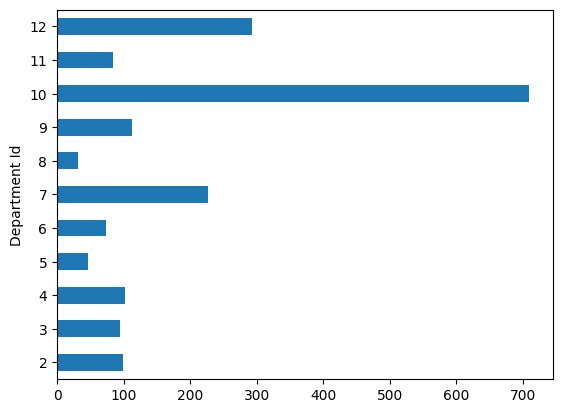

In [68]:
dataset.groupby("Department Id")["Product Price"].mean().plot.barh()

In [69]:
dataset.isnull().sum()

Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Late_delivery_risk               0
Category Id                      0
Customer Id                      0
Customer Zipcode                 3
Department Id                    0
Latitude                         0
Longitude                        0
Order Customer Id                0
Order Id                         0
Order Item Cardprod Id           0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Profit Per Order           0
Product Card Id                  0
Product Category Id              0
Product Price                    0
Product Status                   0
DEBIT                            0
PAYMENT             

In [70]:
for x in dataset.columns:
    if dataset[x].isnull().sum() >= 10:
        print(dataset[x].isnull().sum())

In [71]:
dataset.dropna(axis=1, inplace=True)

In [72]:
dataset.isnull().sum()

Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Late_delivery_risk               0
Category Id                      0
Customer Id                      0
Department Id                    0
Latitude                         0
Longitude                        0
Order Customer Id                0
Order Id                         0
Order Item Cardprod Id           0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Profit Per Order           0
Product Card Id                  0
Product Category Id              0
Product Price                    0
Product Status                   0
DEBIT                            0
PAYMENT                          0
TRANSFER            

In [73]:
X = dataset.drop("Product Price", axis = 1)
y = dataset["Product Price"]

In [74]:
X.head(2)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Status,DEBIT,PAYMENT,TRANSFER,Late delivery,Shipping canceled,Shipping on time,EE. UU.,Puerto Rico,Consumer,Corporate,Home Office,Africa,Europe,LATAM,Pacific Asia,USCA,First Class,Same Day,Second Class,Standard Class,Order Month,Order Day,Order year,Order Hour,Order Minutes,ShippingMonth,Shipping Day,Shipping Year,Shipping Hour,Shipping Minutes
0,3,4,91.250000,314.640015,0,73,20755,2,18.251453,-66.037056,20755,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,1360,73,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,31,2018,22,56,2,3,2018,22,56
1,5,4,-249.089996,311.359985,1,73,19492,2,18.279451,-66.037064,19492,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,1360,73,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,13,2018,12,27,1,18,2018,12,27


In [75]:
y.head(2)

0    327.75
1    327.75
Name: Product Price, dtype: float64

In [76]:
categorical_feature = list()
for feature in X.columns:
    if X[feature].dtype == "O":
        categorical_feature.append(feature)

print(categorical_feature)

['Order Month', 'Order Day', 'Order year', 'Order Hour', 'Order Minutes', 'ShippingMonth', 'Shipping Day', 'Shipping Year', 'Shipping Hour', 'Shipping Minutes']


In [77]:
for feature in X.columns:
    if feature in categorical_feature:
        X[feature] = X[feature].astype("int64")
print(X.dtypes)

Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Late_delivery_risk                 int64
Category Id                        int64
Customer Id                        int64
Department Id                      int64
Latitude                         float64
Longitude                        float64
Order Customer Id                  int64
Order Id                           int64
Order Item Cardprod Id             int64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Id                      int64
Order Item Product Price         float64
Order Item Profit Ratio          float64
Order Item Quantity                int64
Sales                            float64
Order Item Total                 float64
Order Profit Per Order           float64
Product Card Id                    int64
Product Category Id                int64
Product Status  

### Dropping Constant Variance

In [78]:
from sklearn.feature_selection import VarianceThreshold

varia_thresh = VarianceThreshold(threshold=0.0)

varia_thresh.fit(X)

VarianceThreshold()

In [79]:
constant_columns = [column for column in X.columns if column not in X.columns[varia_thresh.get_support()]]

In [80]:
varia_thresh.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [81]:
print(len(constant_columns))

1


In [82]:
X = X.drop(constant_columns, axis=1)

In [83]:
## Shape after dropping constant variance feature

X.shape

(180519, 54)

### Dropping Highly Correlated Feature On The Training Dataset

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
corr_matrix = X.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [86]:
to_drop = [col for col in upper.columns if any(upper[col] > 0.7 )]

print(to_drop)

['Department Id', 'Order Customer Id', 'Order Item Cardprod Id', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Product Card Id', 'Product Category Id', 'Late delivery', 'EE. UU.', 'Puerto Rico', 'Standard Class', 'Order year', 'ShippingMonth', 'Shipping Year', 'Shipping Hour', 'Shipping Minutes']


In [87]:
X.drop(to_drop, axis=1, inplace=True)

X.head(2)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Latitude,Longitude,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Quantity,DEBIT,PAYMENT,TRANSFER,Shipping canceled,Shipping on time,Consumer,Corporate,Home Office,Africa,Europe,LATAM,Pacific Asia,USCA,First Class,Same Day,Second Class,Order Month,Order Day,Order Hour,Order Minutes,Shipping Day
0,3,4,91.250000,314.640015,0,73,20755,18.251453,-66.037056,77202,13.110000,0.04,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,31,22,56,3
1,5,4,-249.089996,311.359985,1,73,19492,18.279451,-66.037064,75939,16.389999,0.05,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,13,12,27,18


In [88]:
X.shape

(180519, 34)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [90]:
X_train.head(2)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Latitude,Longitude,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Quantity,DEBIT,PAYMENT,TRANSFER,Shipping canceled,Shipping on time,Consumer,Corporate,Home Office,Africa,Europe,LATAM,Pacific Asia,USCA,First Class,Same Day,Second Class,Order Month,Order Day,Order Hour,Order Minutes,Shipping Day
177784,6,2,-4.3,148.440002,1,46,564,18.359095,-66.078316,10785,1.5,0.01,3,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,6,7,10,6,13
80465,2,4,0.0,167.990005,0,48,3610,38.461849,-77.417992,29666,32.0,0.16,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,3,9,0,58,11


In [91]:
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(X_train, y_train)

<Axes: >

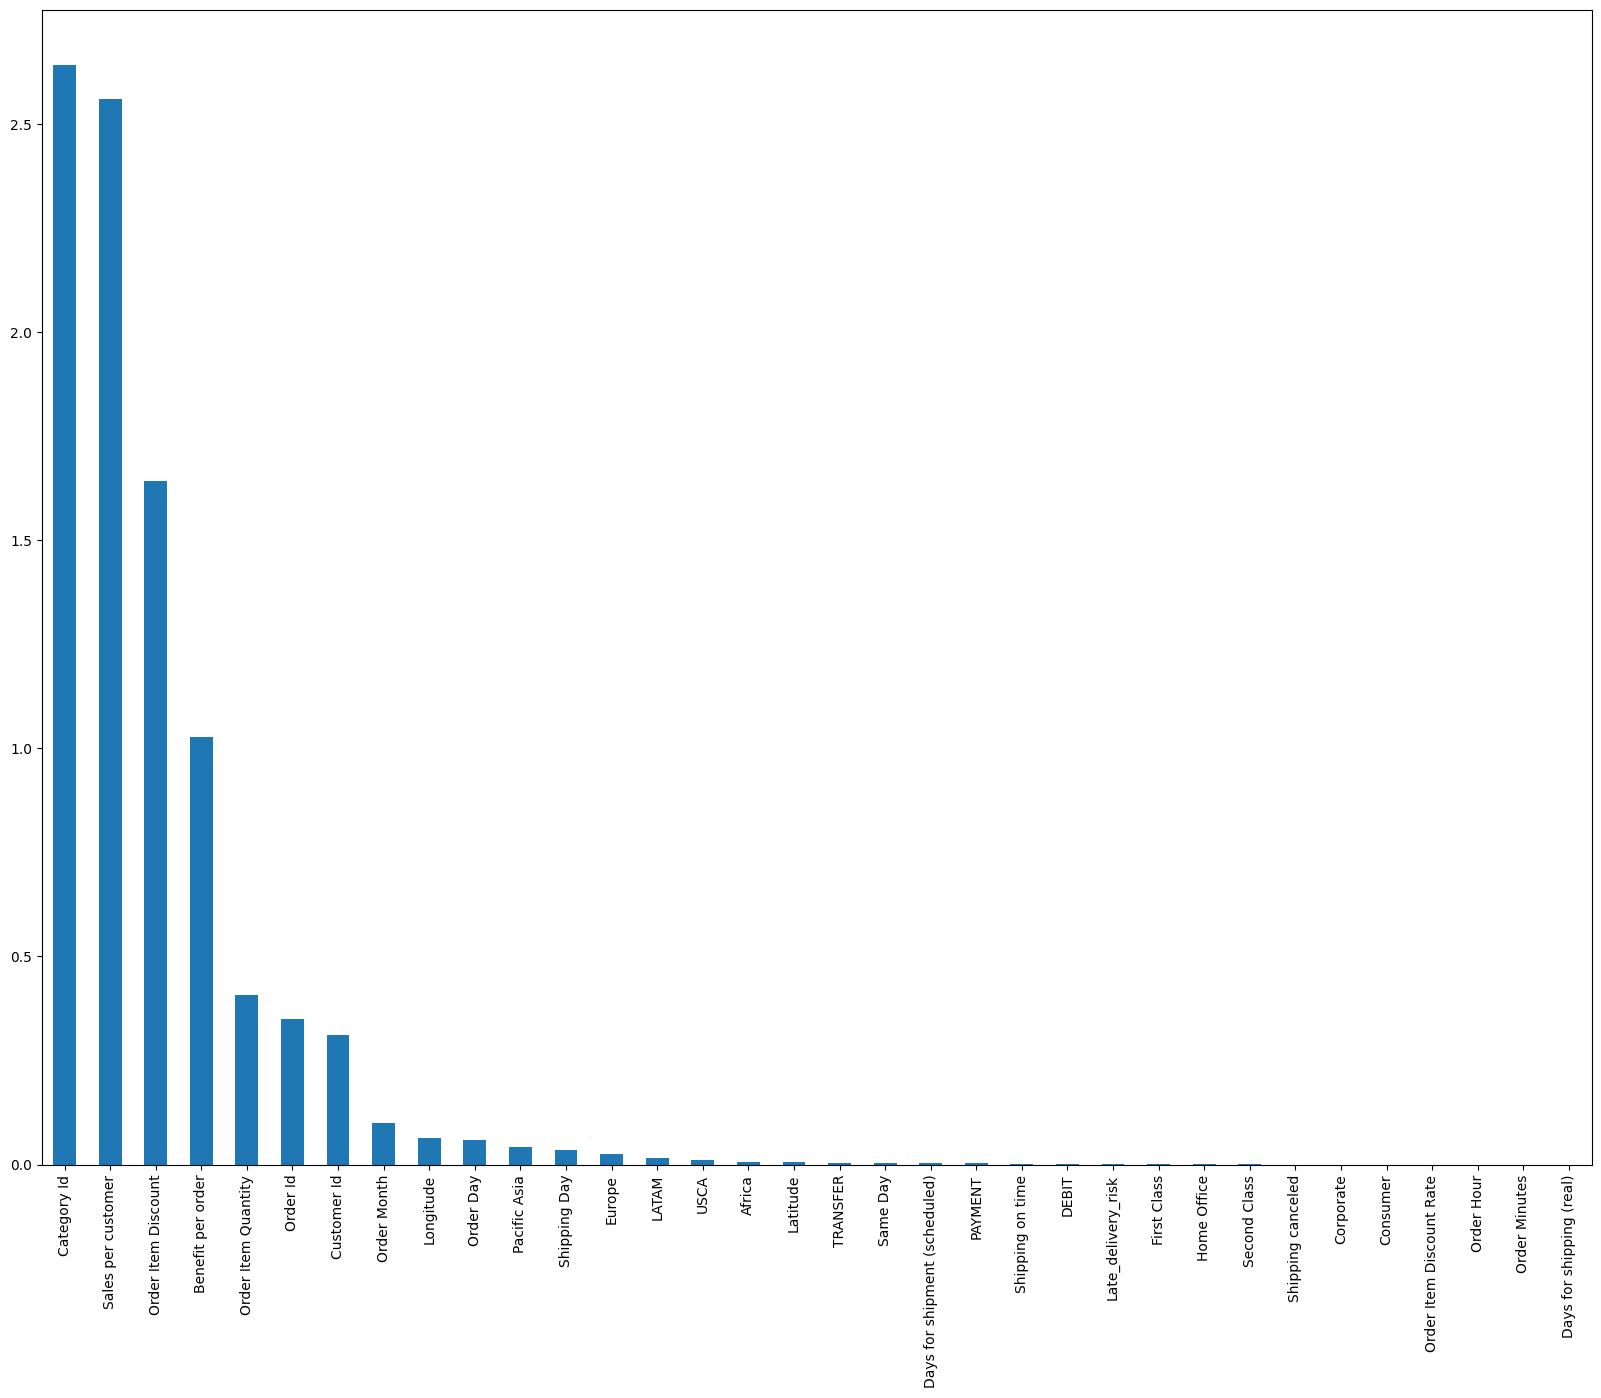

In [92]:
mutual_info = pd.Series(mutual_info)

mutual_info.index = X_train.columns

mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,15))

In [93]:
# below is the rank of dependency between Dependent and Independent Feature

mutual_info.sort_values(ascending=False)

Category Id                      2.643798
Sales per customer               2.561859
Order Item Discount              1.642896
Benefit per order                1.027353
Order Item Quantity              0.407220
Order Id                         0.350557
Customer Id                      0.310508
Order Month                      0.099936
Longitude                        0.063790
Order Day                        0.058410
Pacific Asia                     0.042536
Shipping Day                     0.035035
Europe                           0.025057
LATAM                            0.016647
USCA                             0.010407
Africa                           0.006316
Latitude                         0.005336
TRANSFER                         0.003521
Same Day                         0.003101
Days for shipment (scheduled)    0.002847
PAYMENT                          0.002764
Shipping on time                 0.002134
DEBIT                            0.001258
Late_delivery_risk               0

In [94]:
X_train.shape

(126363, 34)

In [95]:
from sklearn.feature_selection import SelectPercentile

selected_top_columns = SelectPercentile(mutual_info_regression, percentile=15)
selected_top_columns.fit(X_train, y_train)

X_train.columns[selected_top_columns.get_support()]

Index(['Benefit per order', 'Sales per customer', 'Category Id',
       'Order Item Discount', 'Order Item Quantity'],
      dtype='object')

In [96]:
selected_columns = ['Benefit per order', 'Sales per customer', 'Category Id','Order Item Discount', 'Order Item Quantity']

X = X[selected_columns]

X.head(2)

,Benefit per order,Sales per customer,Category Id,Order Item Discount,Order Item Quantity
0,91.250000,314.640015,73,13.110000,1
1,-249.089996,311.359985,73,16.389999,1


In [100]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import r2_score

In [101]:
linear = LinearRegression()

scores = cross_val_score(linear, X, y, cv=5)

print(np.mean(scores))

0.948360981997916


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [103]:
alpha_values = [1.0, 0.1, 10, 50, 100]

for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    model = ridge.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    score = r2_score(y_test, y_pred)

    print(f"The score for alpha {alpha} is {score}")

The score for alpha 1.0 is 0.9515194376670493
The score for alpha 0.1 is 0.9515194407061702
The score for alpha 10 is 0.9515194068731693
The score for alpha 50 is 0.9515192611574005
The score for alpha 100 is 0.9515190587016651


In [104]:
import pickle

In [105]:
pickle.dump(ridge, open("stock.pkl", "wb"))